# Contents

[Imports](#Imports)<br>
[Table_creation](#Table_creation)<br>
[Analysis](#Analysis)<br>
[Plots](#Plots)

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df_tags = pd.read_csv('../data/raw/ml-25m/tags.csv')
# df_gscores = pd.read_csv('../data/raw/ml-25m/genome-scores.csv')
# df_gtags = pd.read_csv('../data/raw/ml-25m/genome-tags.csv')
# df_links = pd.read_csv('../data/raw/ml-25m/links.csv')
#df_movies = pd.read_csv('../data/raw/ml-25m/movies.csv')
df_ratings = pd.read_csv('../data/raw/ml-25m/ratings.csv')

In [2]:
# display(df_tags.head())
# print(df_tags.info())
display(df_ratings.head())
print(df_ratings.info())

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB
None


In [3]:
df_ratings.drop(['rating','timestamp'], axis=1).duplicated().sum()
# no movie is rated twice by same user

0

# Table_creation

In [4]:
user_rating_sum = df_ratings.drop(['rating','timestamp'], axis=1).groupby(by=['userId']).count()
user_rating_sum.rename(columns={'movieId':'n_movies'}, inplace=True)
user_rating_dist = df_ratings.drop(['timestamp'], axis=1).groupby(by=['userId','rating']).count()
user_rating_dist.rename(columns={'movieId':'n_movies'}, inplace=True)
user_rating_avg = df_ratings.drop(['movieId','timestamp'], axis=1).groupby(by=['userId']).mean()
user_rating_avg.rename(columns={'rating':'avg_rating'}, inplace=True)

# Analysis

In [5]:
print('Basic statistics for average rating per each user:')
display(user_rating_avg.describe())

Basic statistics for average rating per each user:


,avg_rating
count,162541.000000
mean,3.679205
std,0.477368
min,0.500000
25%,3.398747
50%,3.700000
75%,4.000000
max,5.000000


In [6]:
print('Basic statistics for number of movies rated by each user:')
display(user_rating_sum.describe())
# min number of movies rated by each user: 20
# max number of movies rated by each user: 32202 => probably outlier, further analysis necessary
# median number of movies rated by each user: 71

print('Number of users, who rated more than 1000 movies:', user_rating_sum[user_rating_sum.n_movies > 1000].count().iloc[0])
print('Number of users, who rated more than 2000 movies:', user_rating_sum[user_rating_sum.n_movies > 2000].count().iloc[0])
print('Number of users, who rated more than 5000 movies:', user_rating_sum[user_rating_sum.n_movies > 5000].count().iloc[0])
print('Number of users total:', user_rating_sum.shape[0])
print('\nTop 10 users:')
print(user_rating_sum.sort_values('n_movies', ascending=False).head(10))


display(user_rating_dist.loc[[72315]])
display(user_rating_dist.loc[[80974]])
display(user_rating_dist.loc[[137293]])
display(user_rating_dist.loc[[33844]])
display(user_rating_dist.loc[[20055]])


Basic statistics for number of movies rated by each user:


,n_movies
count,162541.000000
mean,153.807932
std,268.047590
min,20.000000
25%,36.000000
50%,71.000000
75%,162.000000
max,32202.000000


Number of users, who rated more than 1000 movies: 2670
Number of users, who rated more than 2000 movies: 434
Number of users, who rated more than 5000 movies: 18
Number of users total: 162541

Top 10 users:
        n_movies
userId          
72315      32202
80974       9178
137293      8913
33844       7919
20055       7488
109731      6647
92046       6564
49403       6553
30879       5693
115102      5649


n_movies
userId rating          
72315  0.5          182
       1.0          327
       1.5          754
       2.0         2219
       2.5         5914
       3.0        10004
       3.5         8069
       4.0         2983
       4.5         1012
       5.0          738

n_movies
userId rating          
80974  0.5            3
       2.0          472
       2.5          523
       3.0         4049
       3.5         1757
       4.0         2279
       4.5           68
       5.0           27

n_movies
userId rating          
137293 0.5            5
       1.0           29
       1.5           80
       2.0          328
       2.5          819
       3.0         3536
       3.5         3233
       4.0          758
       4.5          113
       5.0           12

n_movies
userId rating          
33844  0.5          446
       1.0          780
       1.5          518
       2.0         1165
       2.5         1069
       3.0         1528
       3.5         1541
       4.0          559
       4.5          258
       5.0           55

n_movies
userId rating          
20055  1.0           72
       1.5          380
       2.0          894
       2.5         1129
       3.0         1437
       3.5         1081
       4.0         1528
       4.5          532
       5.0          435

In [7]:
# mux = pd.MultiIndex.from_arrays([
#     list('aaaabbbbbccddddd'),
#     list('tuvwtuvwtuvwtuvw')
# ], names=['one', 'two'])

# df = pd.DataFrame({'col': np.arange(len(mux))}, mux)
# df.loc[['a']]

In [8]:
df_rat = user_rating_avg.merge(right=user_rating_sum, on='userId', how='outer')
df_rat.rename(columns={'n_movies':'n_ratings'}, inplace=True)
display(df_rat.head())

print('Number of users, who only made 5.0 ratings:', df_rat[df_rat.avg_rating == 5].count().iloc[0])

,avg_rating,n_ratings
userId,,
1,3.814286,70
2,3.630435,184
3,3.697409,656
4,3.378099,242
5,3.752475,101


Number of users, who only made 5.0 ratings: 203


In [9]:
df_rat[df_rat.avg_rating == 5].sort_values(by='n_ratings', ascending=False)

,avg_rating,n_ratings
userId,,
75309,5.0,5525
12002,5.0,677
99091,5.0,262
159290,5.0,250
35589,5.0,219
...,...,...
36868,5.0,20
136331,5.0,20
31747,5.0,20


In [14]:
df_rat[(df_rat.n_ratings == 20) & (df_rat.avg_rating < 5.0)].sort_values(by='avg_rating', ascending=False)

,avg_rating,n_ratings
userId,,
90506,4.975,20
117342,4.975,20
129889,4.975,20
77144,4.950,20
14623,4.950,20
...,...,...
122697,0.500,20
63044,0.500,20
94280,0.500,20


# Plots

<div class="alert alert-block alert-info"><b>Caution:</b> sns.relplot is not compatible with subplots!<br>
By limiting the x axis to 10,000 one extreme outlier (~ at 32,000) was excluded for better readability.</div>

In [11]:
# The following graphs are not used in the report and thus deactivated.

# fig, ax = plt.subplots(figsize=(18, 5))
# # remove axes and frame of subplot figure
# ax.xaxis.set_visible(False)
# ax.yaxis.set_visible(False)
# ax.axis('off')
# plt.subplots_adjust(hspace=0.5) # prevents overlapping of single plots

# plt.subplot(121)
# plt.scatter(x=df_rat.n_ratings, y=df_rat.avg_rating, s=5)
# plt.xlim([0,10000])
# plt.title('Average rating over number of ratings a user gave')
# plt.xlabel('number ratings')
# plt.ylabel('average rating')
# plt.plot([0,6000],[5,5], c='r', alpha=0.6)

# plt.subplot(122)
# # sns.relplot(x=df_rat.n_ratings, y=df_rat.avg_rating) # relplot is not compatible with subplots!
# sns.scatterplot(x=df_rat.n_ratings, y=df_rat.avg_rating, hue=df_rat.avg_ratings, size=10, legend=False)
# plt.plot([0,6000],[5,5], c='red', alpha=0.6)
# plt.xlim([0,10000])
# plt.title('Average rating over number of ratings a user gave')
# plt.xlabel('number ratings')
# plt.ylabel('average rating');

# the average rating of users with fewer ratings tend to be more dispersed than the average of users with many ratings 

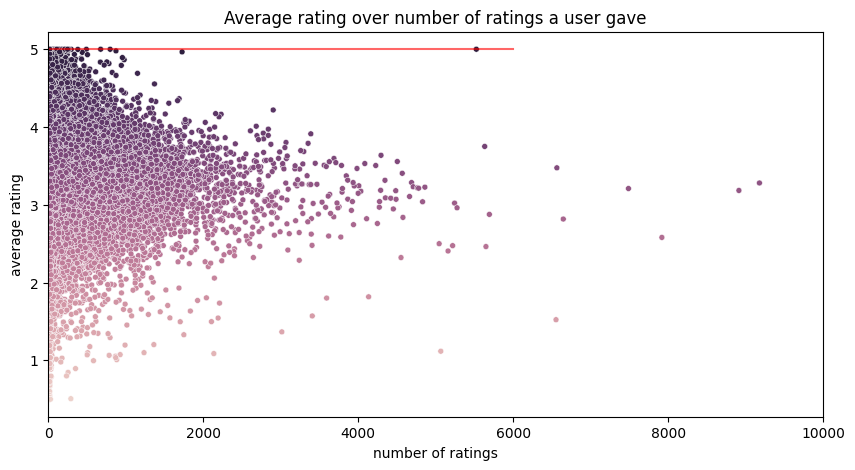

In [12]:
fig = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=df_rat.n_ratings, y=df_rat.avg_rating, hue=df_rat.avg_rating, size=10, legend=False)
plt.plot([0,6000],[5,5], c='red', alpha=0.6)
plt.xlim([0,10000])
plt.title('Average rating over number of ratings a user gave')
plt.xlabel('number of ratings')
plt.ylabel('average rating');